In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load Data

In [3]:
cohort_1_w1w2 = pd.read_csv('/Users/cguy/kelstuff/ga_summer_2016/cohort_1_w1w2.csv')
cohort_1_w1w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,9,10,11,12,16,20,23,26,29,30,31,32,33,36,38,39,40,41,43,44,45,46,51,52,53,56,59,60,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AcSuppSv,AgeMP,AmIAKN,Asian,Baseline,BlkAfrAm,BudgetSv,CareerSv,CurrFTE,...,Sex,SpecEdSv,St,StFCID,StFIPS,SubAbuse,TribeSv,Wave,Weight,White
0,0,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450290395006,2.0,Yes,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
1,4,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450448396586,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0
2,10,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,0.0,AK,AK450540097503,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,1.26,1.0
3,14,0.0,17.0,0.0,0.0,Yes,0.0,0.0,0.0,No,...,1.0,0.0,AK,AK450652098623,2.0,No,0.0,Wave 1: Age 17 Baseline Survey,3.31,1.0
4,17,0.0,17.0,1.0,0.0,Yes,0.0,0.0,0.0,No,...,2.0,1.0,AK,AK451448406587,2.0,No,1.0,Wave 1: Age 17 Baseline Survey,1.36,0.0


In [4]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['CurrenRoll','HighEdCert', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','St','DelinqntSv','Wave']]


In [5]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('St')
services_count = services_count.drop('DelinqntSv')


features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Wave,Num_services
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,4
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,AK,0.0,Wave 1: Age 17 Baseline Survey,2


In [6]:
#  # with num_services and state as one feature

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_2 = features.copy()

features_w2_original = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_original = features_w2_original.drop('Wave', axis = 1)

features_w2_original['St'] = le.fit_transform(features_w2_original['St'])

features_w2_original.head()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2


In [7]:
    # with num_services and states as dummies

features_2 = features.copy()

features_w2_stDums = features_2[features_2.Wave == "Wave 2: Age 19 Followup"]
features_w2_stDums = features_w2_stDums.drop('Wave', axis = 1)

features_w2_stDums = pd.get_dummies(features_w2_stDums)

features_w2_stDums.head()



,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
    # withOUT num_services and states as dummies

features_noNum_stDums = features_w2_stDums.copy()

features_noNum_stDums = features_noNum_stDums.drop('Num_services', axis = 1)

features_noNum_stDums.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# withOUT num_services and state as one feature

features_noNum_st_one = features_w2_original.copy()

features_noNum_st_one = features_noNum_st_one.drop('Num_services', axis = 1)

features_noNum_st_one.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0


In [10]:
# withOUT states and with num_services
    
features_noSt = features.copy()

features_noSt = features_noSt[features_noSt.Wave == "Wave 2: Age 19 Followup"]
features_noSt = features_noSt.drop('Wave', axis = 1)
features_noSt = features_noSt.drop('St', axis = 1)

features_noSt.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [11]:
# withOUT states and Num_services

features_noSt_noNum = features_noSt.copy()

features_noSt_noNum = features_noSt_noNum.drop('Num_services', axis = 1)

features_noSt_noNum.head()


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2_ = targets[targets.Wave == "Wave 2: Age 19 Followup"]
targets_w2_ = targets_w2_.drop('Wave', axis = 1)


targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])
targets_w2.head()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,CurrenRoll,HighEdCert
7328,2,7
7329,2,5
7330,3,5
7331,2,5
7332,2,5


In [13]:
targets_labels = targets[targets.Wave == "Wave 2: Age 19 Followup"]

targets_labels.HighEdCert.value_counts()

Blank                      2813
High school diploma/GED    2508
None of the above          1705
Declined                     95
Vocational certificate       62
Vocational license           19
Associate's Degree            7
Higher degree                 7
Bachelor's Degree             2
Name: HighEdCert, dtype: int64

In [14]:
targets_w2.HighEdCert.value_counts()

3    2813
5    2508
7    1705
0     110
4      95
8      62
9      19
6       7
1       7
2       2
Name: HighEdCert, dtype: int64

In [15]:
targets_labels.CurrenRoll.value_counts()

Blank       2808
Yes         2447
No          1996
Declined      77
Name: CurrenRoll, dtype: int64

In [16]:
targets_w2.CurrenRoll.value_counts()

0    2808
3    2447
2    1996
1      77
Name: CurrenRoll, dtype: int64

In [17]:
# y = 0 v 1, 
    # where 1 = Vocational certificate (8), Vocational license (9), Associate's Degree (6), 
            #   Higher degree (1), Bachelor's Degree (2)
    # or 1 = when CurrenRoll == 3

def determine_Success(row):
    column_1 = 'HighEdCert'
    column_2 = 'CurrenRoll'
    if row[column_1] == 1:
        val = 1
    elif row[column_1] ==  2:
        val = 1
    elif row[column_1] ==  6:
        val = 1
    elif row[column_1] ==  9:
        val = 1
    elif row[column_1] ==  8:
        val = 1
    elif row[column_2] == 3:
        val = 1
    else:
        val = 0
    return val
    
targets_w2_final = targets_w2.copy()

targets_w2_final['Success'] = targets_w2_final.apply(determine_Success, axis=1)
targets_w2_final.head(10)



,CurrenRoll,HighEdCert,Success
7328,2,7,0
7329,2,5,0
7330,3,5,1
7331,2,5,0
7332,2,5,0
7333,3,7,1
7334,3,7,1
7335,2,5,0
7336,2,7,0
7337,3,7,1


In [18]:
targets_w2_final['Success'].value_counts()

0    4830
1    2498
Name: Success, dtype: int64

# Feature Importance

In [19]:
# with num_services and state as one feature
features_w2_original

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,4
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,2


In [20]:
# with num_services and states as dummies
features_w2_stDums

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X1 = features_w2_stDums

In [22]:
X1 = features_w2_stDums
X1.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'DelinqntSv',
       u'Num_services', u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA',
       u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID',
       u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI',
       u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH',
       u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI',
       u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI',
       u'St_WV', u'St_WY'],
      dtype='object')

In [23]:
y = targets_w2_final['Success']

In [24]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X1, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

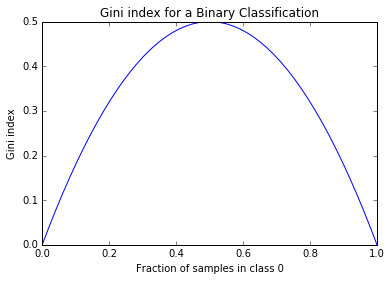

In [25]:
C0 = np.linspace(0,1)
C1 = 1.0 - C0

gini = 1 - C0**2 - C1**2

plt.plot(C0, gini)
plt.title('Gini index for a Binary Classification')
plt.xlabel('Fraction of samples in class 0')
plt.ylabel('Gini index')

In [26]:
root_node_values = [0.22, 0.04, 0.7, 0.04]

def gini(values):
    tot = 0.0
    for val in values:
        tot += val ** 2
    
    return 1.0 - tot

gini(root_node_values)

0.45840000000000003

In [27]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X1.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
DelinqntSv,0.504551
St_LA,0.217442
St_IA,0.196613
St_NY,0.075534
ILNAsv,0.005860


In [28]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X1, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 58)

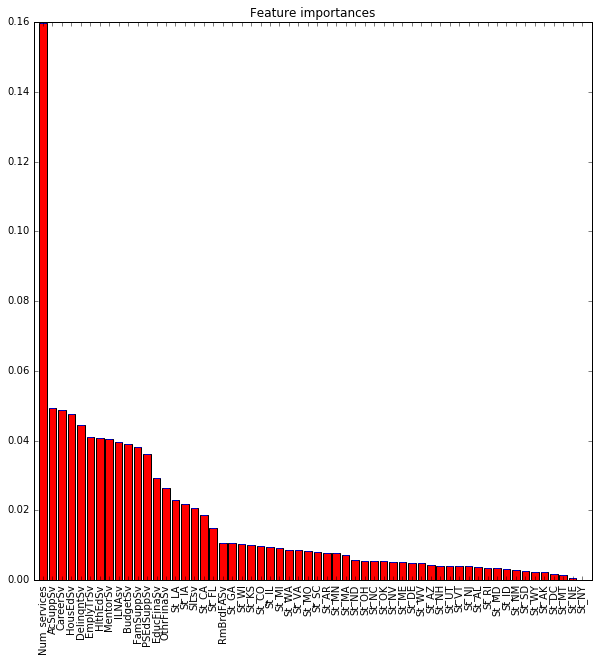

In [29]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X1.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X1.shape[1]])

,dt_importance,rf_importance,et_importance
Num_services,0.166780,0.159796,0.145689
AcSuppSv,0.051456,0.049438,0.056052
CareerSv,0.045195,0.048791,0.048607
HousEdSv,0.046387,0.047665,0.044296
DelinqntSv,0.039365,0.044619,0.048998
EmplyTrSv,0.053633,0.041059,0.050651
HlthEdSv,0.046041,0.040863,0.040867
MentorSv,0.050652,0.040603,0.043875
ILNAsv,0.042529,0.039574,0.055012
BudgetSv,0.037109,0.039009,0.049085


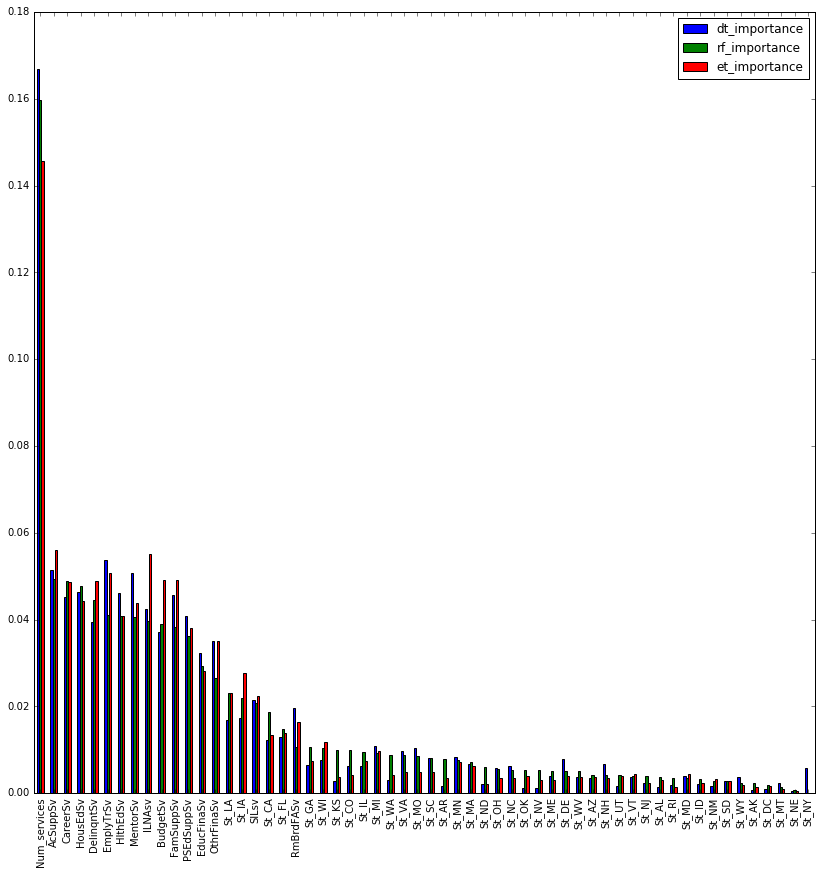

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X1, y)

et.fit(X1, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X1.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [31]:
# withOUT num_services and states as dummies
features_noNum_stDums

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,...,St_RI,St_SC,St_SD,St_UT,St_VA,St_VT,St_WA,St_WI,St_WV,St_WY
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X2 = features_noNum_stDums
X2.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'DelinqntSv',
       u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA', u'St_CO', u'St_DC',
       u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID', u'St_IL', u'St_KS',
       u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI', u'St_MN', u'St_MO',
       u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH', u'St_NJ', u'St_NM',
       u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI', u'St_SC', u'St_SD',
       u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [33]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X2, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 57)

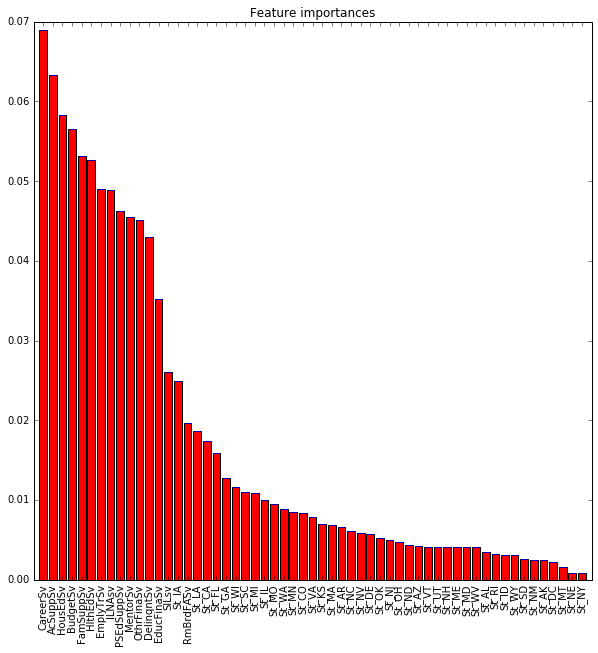

In [35]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

,dt_importance,rf_importance,et_importance
CareerSv,0.059421,0.068894,0.072166
AcSuppSv,0.051448,0.063313,0.067964
HousEdSv,0.066374,0.058285,0.058071
BudgetSv,0.052489,0.056528,0.062692
FamSuppSv,0.057858,0.053119,0.060162
HlthEdSv,0.066021,0.052655,0.053580
EmplyTrSv,0.058705,0.049027,0.054355
ILNAsv,0.075205,0.048875,0.058577
PSEdSuppSv,0.045578,0.046306,0.044947
MentorSv,0.053320,0.045463,0.057384


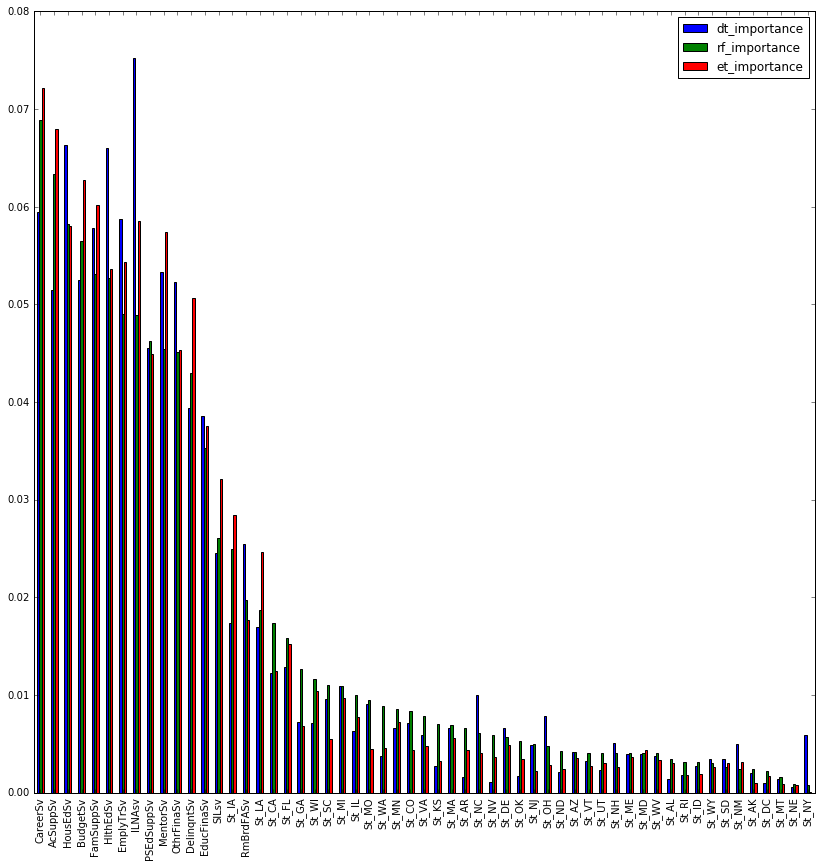

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X2, y)

et.fit(X2, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X2.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [37]:
# withOUT num_services and state as one feature
features_noNum_st_one

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0


In [38]:
X3 = features_noNum_st_one
X3.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'St',
       u'DelinqntSv'],
      dtype='object')

In [39]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X3, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X3, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 16)

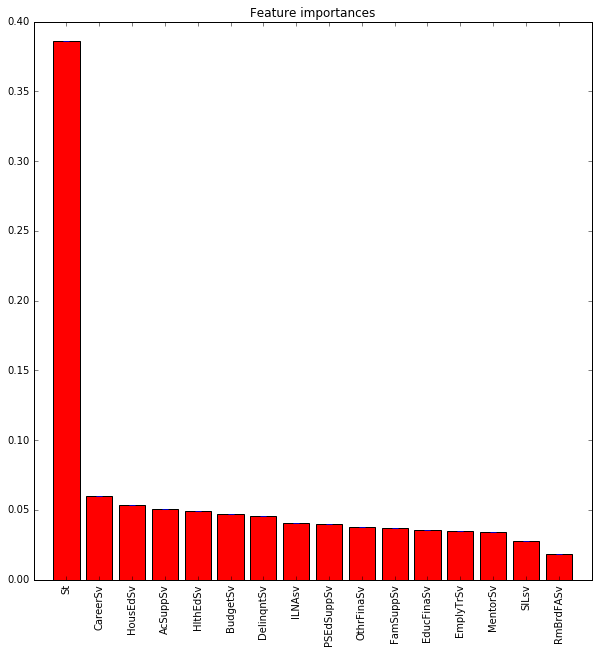

In [41]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X3.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X3.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X3.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X3.shape[1]])

,dt_importance,rf_importance,et_importance
St,0.206486,0.385880,0.386668
CareerSv,0.075672,0.060081,0.043785
HousEdSv,0.046981,0.053696,0.049936
AcSuppSv,0.070713,0.050506,0.055129
HlthEdSv,0.066405,0.049450,0.045398
BudgetSv,0.046049,0.047373,0.045751
DelinqntSv,0.039365,0.045897,0.055160
ILNAsv,0.068430,0.040592,0.034502
PSEdSuppSv,0.047313,0.040009,0.045384
OthrFinaSv,0.059357,0.037433,0.035427


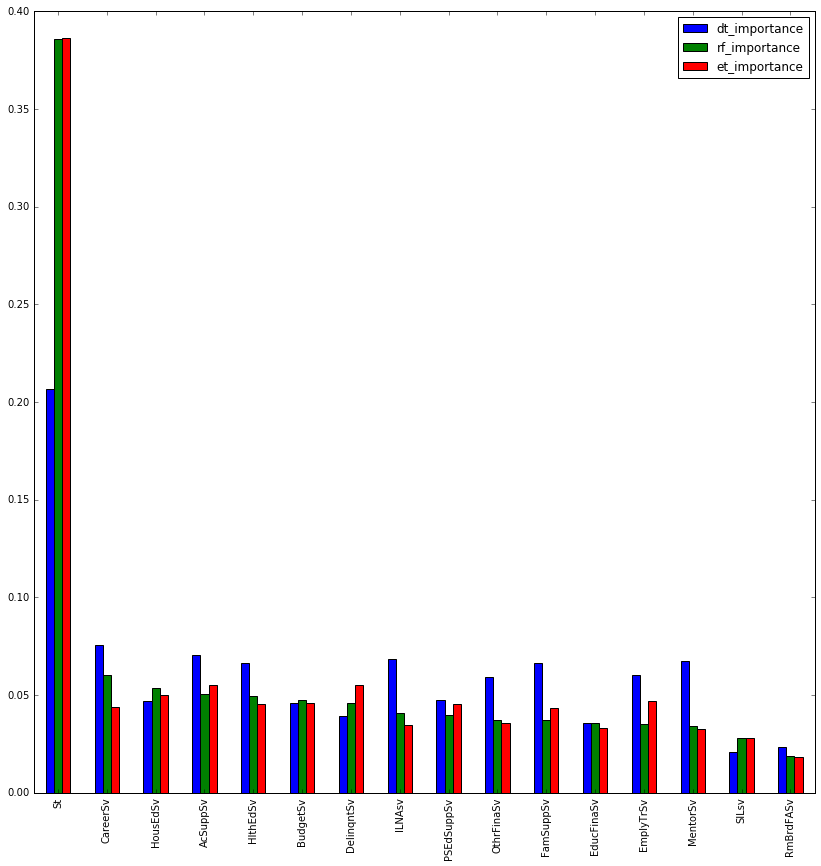

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X3, y)

et.fit(X3, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X3.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [43]:
# withOUT states and with num_services
features_noSt

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv,Num_services
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [44]:
X4 = features_noSt
X4.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'DelinqntSv',
       u'Num_services'],
      dtype='object')

In [45]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X4, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X4, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 16)

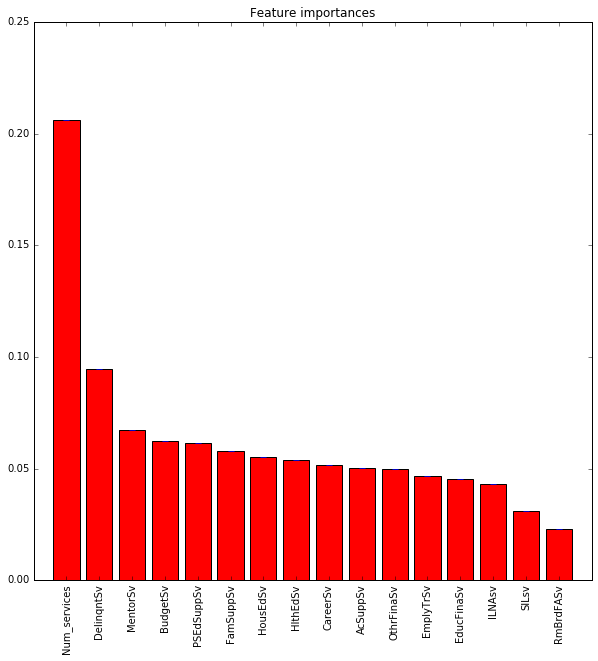

In [47]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X4.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X4.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X4.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X4.shape[1]])

,dt_importance,rf_importance,et_importance
Num_services,0.210448,0.206082,0.178389
DelinqntSv,0.085665,0.094469,0.105085
MentorSv,0.038638,0.067461,0.052341
BudgetSv,0.061072,0.062235,0.058799
PSEdSuppSv,0.068802,0.061576,0.055663
FamSuppSv,0.054743,0.057957,0.052209
HousEdSv,0.047149,0.055195,0.064561
HlthEdSv,0.066559,0.054029,0.052135
CareerSv,0.042712,0.051525,0.065985
AcSuppSv,0.083025,0.050465,0.056016


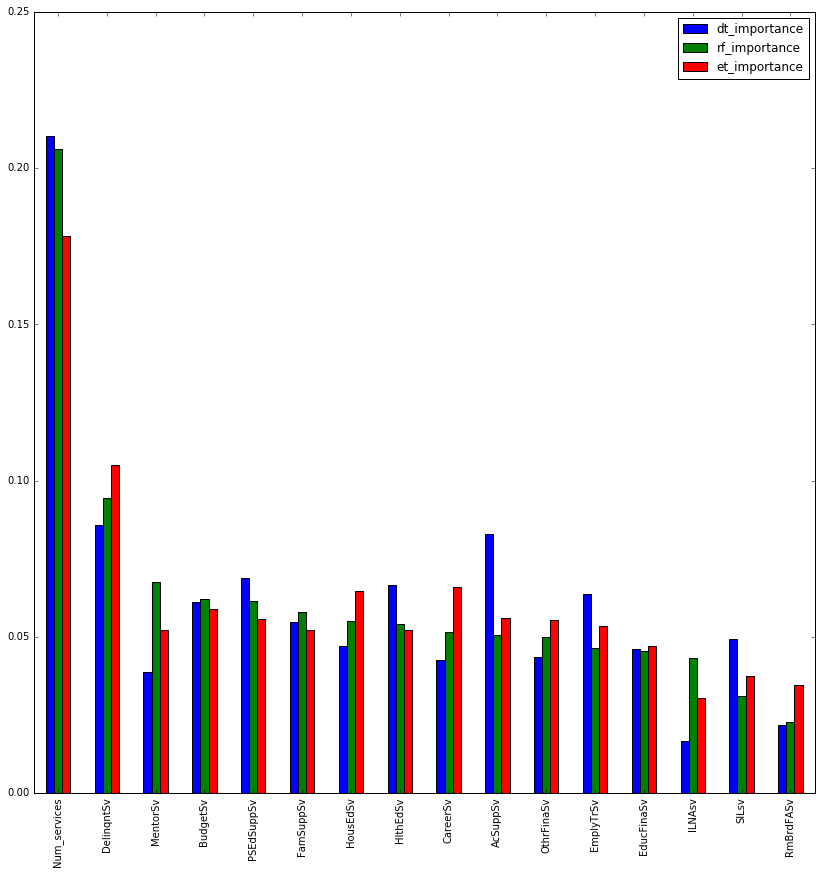

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X4, y)

et.fit(X4, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X4.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [49]:
# withOUT states and Num_services
features_noSt_noNum

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,DelinqntSv
7328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
X5 = features_noSt_noNum
X5.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'DelinqntSv'],
      dtype='object')

In [51]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X5, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X5, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(-1, 15)

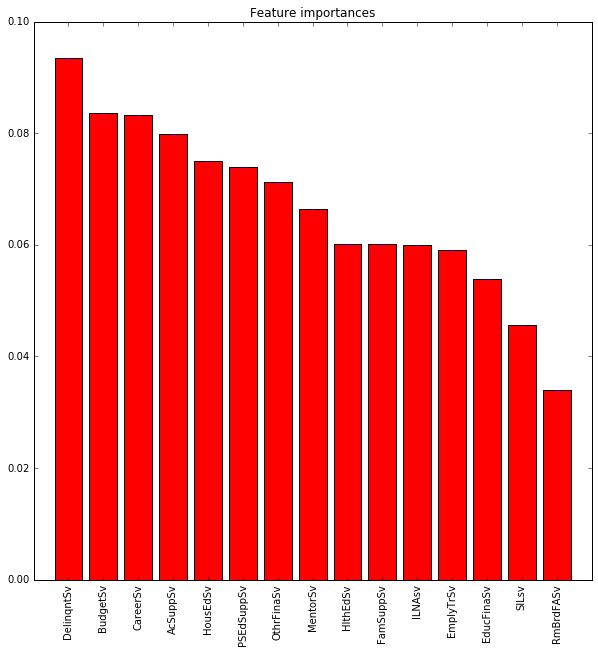

In [53]:
all(rf.feature_importances_ == np.mean([dt.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 
std = np.std([dt.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X5.columns

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X5.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X5.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X5.shape[1]])

,dt_importance,rf_importance,et_importance
DelinqntSv,0.074648,0.093423,0.105440
BudgetSv,0.067260,0.083635,0.070686
CareerSv,0.079312,0.083349,0.076690
AcSuppSv,0.097952,0.079887,0.071005
HousEdSv,0.068028,0.075043,0.087880
PSEdSuppSv,0.098128,0.074019,0.078942
OthrFinaSv,0.069865,0.071235,0.053932
MentorSv,0.049903,0.066428,0.066713
HlthEdSv,0.073141,0.060167,0.080380
FamSuppSv,0.071410,0.060126,0.059121


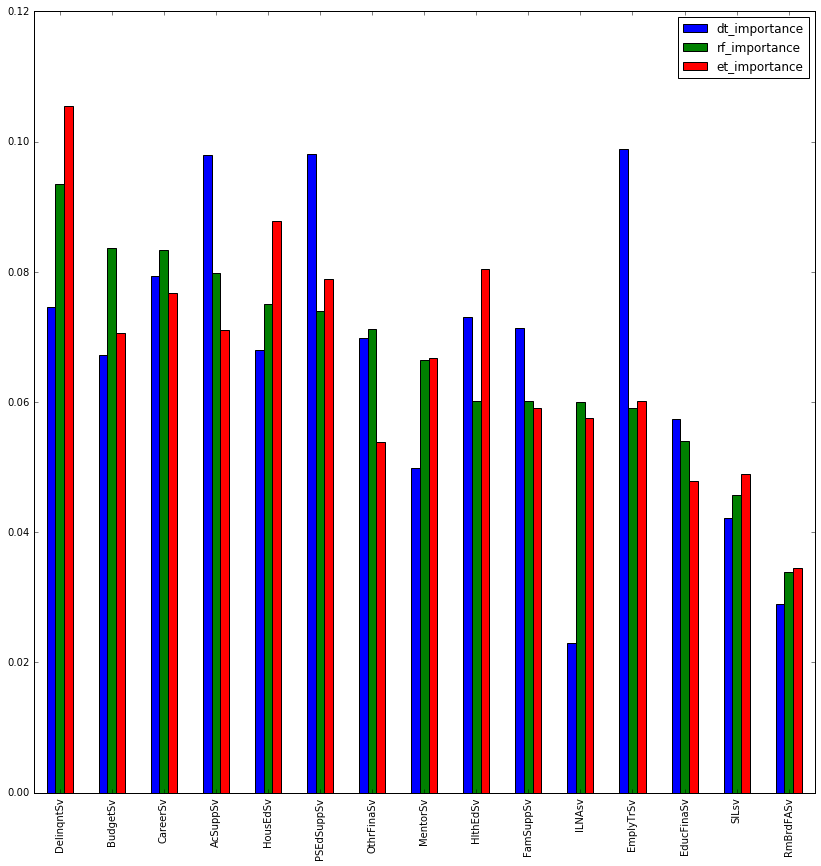

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X5, y)

et.fit(X5, y)

importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X5.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar', figsize=(14,14))
importances.head(10)

In [55]:
features_noNum_stDums.columns

Index([u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv',
       u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv', u'MentorSv',
       u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv', u'DelinqntSv',
       u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA', u'St_CO', u'St_DC',
       u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID', u'St_IL', u'St_KS',
       u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI', u'St_MN', u'St_MO',
       u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH', u'St_NJ', u'St_NM',
       u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI', u'St_SC', u'St_SD',
       u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [56]:
# Adjust X

In [57]:
features_noNum_stDums_final = features_noNum_stDums.drop(['ILNAsv','BudgetSv','HousEdSv','HlthEdSv','FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv'], axis = 1)

In [58]:
features_noNum_stDums_final.columns

Index([u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv', u'DelinqntSv',
       u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA', u'St_CO', u'St_DC',
       u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID', u'St_IL', u'St_KS',
       u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI', u'St_MN', u'St_MO',
       u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH', u'St_NJ', u'St_NM',
       u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI', u'St_SC', u'St_SD',
       u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI', u'St_WV', u'St_WY'],
      dtype='object')

In [59]:
features_w2_stDums_final = features_w2_stDums.drop(['ILNAsv','BudgetSv','HousEdSv','HlthEdSv','FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv'], axis = 1)

In [60]:
features_w2_stDums_final.columns

Index([u'AcSuppSv', u'PSEdSuppSv', u'CareerSv', u'EmplyTrSv', u'DelinqntSv',
       u'Num_services', u'St_AK', u'St_AL', u'St_AR', u'St_AZ', u'St_CA',
       u'St_CO', u'St_DC', u'St_DE', u'St_FL', u'St_GA', u'St_IA', u'St_ID',
       u'St_IL', u'St_KS', u'St_LA', u'St_MA', u'St_MD', u'St_ME', u'St_MI',
       u'St_MN', u'St_MO', u'St_MT', u'St_NC', u'St_ND', u'St_NE', u'St_NH',
       u'St_NJ', u'St_NM', u'St_NV', u'St_NY', u'St_OH', u'St_OK', u'St_RI',
       u'St_SC', u'St_SD', u'St_UT', u'St_VA', u'St_VT', u'St_WA', u'St_WI',
       u'St_WV', u'St_WY'],
      dtype='object')

In [61]:
# DelinqntSv, AcSuppSv, PSEdSuppSv, CareerSv, EmplyTrSv

In [62]:
# ['ILNAsv','BudgetSv','HousEdSv','HlthEdSv','FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv']

In [93]:
## And a function to plot your confusion matrix:
import matplotlib.patheffects as path_effects
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

# Model

In [63]:
y
X1 = features_w2_stDums_final
X2 = features_noNum_stDums_final

In [64]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

all_models = {}

In [65]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[1194  255]
 [ 546  204]]
             precision    recall  f1-score   support

          0       0.69      0.82      0.75      1449
          1       0.44      0.27      0.34       750

avg / total       0.60      0.64      0.61      2199



In [66]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [67]:
gsknn.fit(X1, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [68]:
gsknn.best_params_


{'n_neighbors': 54}

In [69]:
gsknn.best_score_

0.66170851528384278

In [70]:
evaluate_model(gsknn.best_estimator_)


[[1321  128]
 [ 628  122]]
             precision    recall  f1-score   support

          0       0.68      0.91      0.78      1449
          1       0.49      0.16      0.24       750

avg / total       0.61      0.66      0.60      2199



0.65620736698499316

In [71]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

In [72]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [73]:
evaluate_model(baggingknn)


[[1228  221]
 [ 557  193]]
             precision    recall  f1-score   support

          0       0.69      0.85      0.76      1449
          1       0.47      0.26      0.33       750

avg / total       0.61      0.65      0.61      2199



0.64620281946339242

In [74]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [75]:
gsbaggingknn.fit(X1, y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=7328, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [76]:
gsbaggingknn.best_params_

{'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 20}

In [77]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}


[[1398   51]
 [ 712   38]]
             precision    recall  f1-score   support

          0       0.66      0.96      0.79      1449
          1       0.43      0.05      0.09       750

avg / total       0.58      0.65      0.55      2199



In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[1312  137]
 [ 580  170]]
             precision    recall  f1-score   support

          0       0.69      0.91      0.79      1449
          1       0.55      0.23      0.32       750

avg / total       0.65      0.67      0.63      2199



In [79]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X1, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 1.0}
0.666621179039
[[1318  131]
 [ 587  163]]
             precision    recall  f1-score   support

          0       0.69      0.91      0.79      1449
          1       0.55      0.22      0.31       750

avg / total       0.64      0.67      0.62      2199



In [80]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X1, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.669759825328
[[1316  133]
 [ 581  169]]
             precision    recall  f1-score   support

          0       0.69      0.91      0.79      1449
          1       0.56      0.23      0.32       750

avg / total       0.65      0.68      0.63      2199



In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[1191  258]
 [ 562  188]]
             precision    recall  f1-score   support

          0       0.68      0.82      0.74      1449
          1       0.42      0.25      0.31       750

avg / total       0.59      0.63      0.60      2199



In [82]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X1, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 5, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
0.662936681223
[[1388   61]
 [ 663   87]]
             precision    recall  f1-score   support

          0       0.68      0.96      0.79      1449
          1       0.59      0.12      0.19       750

avg / total       0.65      0.67      0.59      2199



In [83]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X1, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 10, 'bootstrap_features': False}
0.665529475983
[[1423   26]
 [ 706   44]]
             precision    recall  f1-score   support

          0       0.67      0.98      0.80      1449
          1       0.63      0.06      0.11       750

avg / total       0.65      0.67      0.56      2199



In [84]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[1449    0]
 [ 750    0]]
             precision    recall  f1-score   support

          0       0.66      1.00      0.79      1449
          1       0.00      0.00      0.00       750

avg / total       0.43      0.66      0.52      2199



/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X1, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'rbf', 'C': 30.0, 'gamma': 'auto'}
0.672216157205
[[1358   91]
 [ 619  131]]
             precision    recall  f1-score   support

          0       0.69      0.94      0.79      1449
          1       0.59      0.17      0.27       750

avg / total       0.65      0.68      0.61      2199



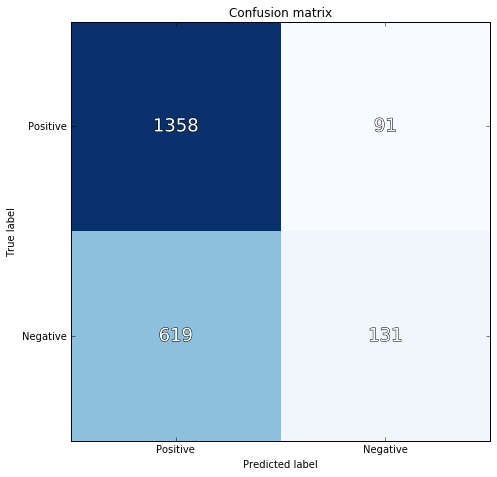

In [94]:
preds = gssvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

In [86]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X1, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'bootstrap_features': False}
0.668804585153
[[1338  111]
 [ 610  140]]
             precision    recall  f1-score   support

          0       0.69      0.92      0.79      1449
          1       0.56      0.19      0.28       750

avg / total       0.64      0.67      0.61      2199



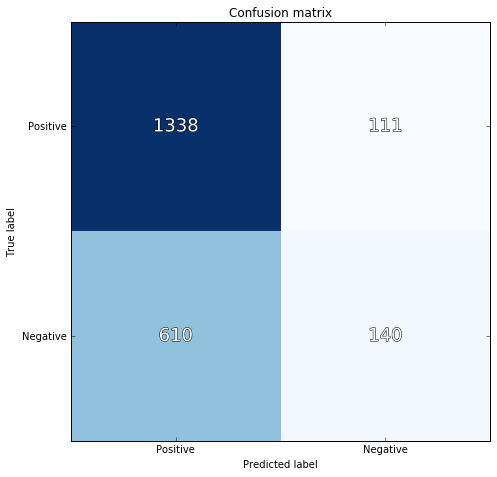

In [95]:
preds = gsbaggingsvm.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

In [87]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[1161  288]
 [ 513  237]]
             precision    recall  f1-score   support

          0       0.69      0.80      0.74      1449
          1       0.45      0.32      0.37       750

avg / total       0.61      0.64      0.62      2199

[[1210  239]
 [ 565  185]]
             precision    recall  f1-score   support

          0       0.68      0.84      0.75      1449
          1       0.44      0.25      0.32       750

avg / total       0.60      0.63      0.60      2199



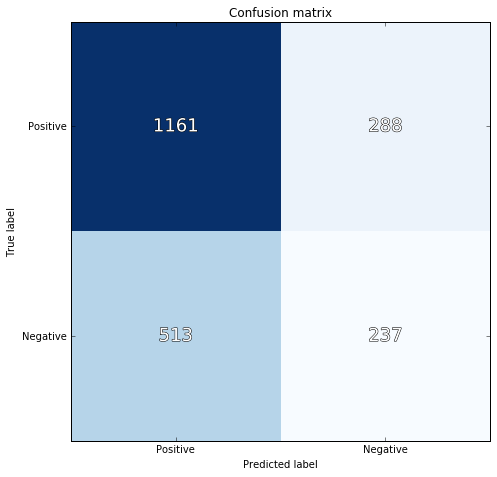

In [97]:
preds = rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

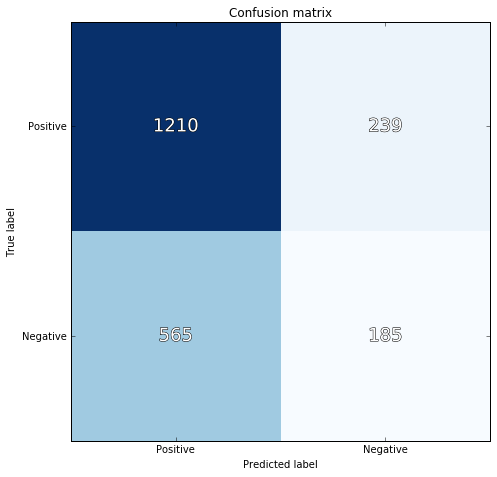

In [96]:
preds = et.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

In [88]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X1, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 3, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.661981441048
[[1419   30]
 [ 720   30]]
             precision    recall  f1-score   support

          0       0.66      0.98      0.79      1449
          1       0.50      0.04      0.07       750

avg / total       0.61      0.66      0.55      2199



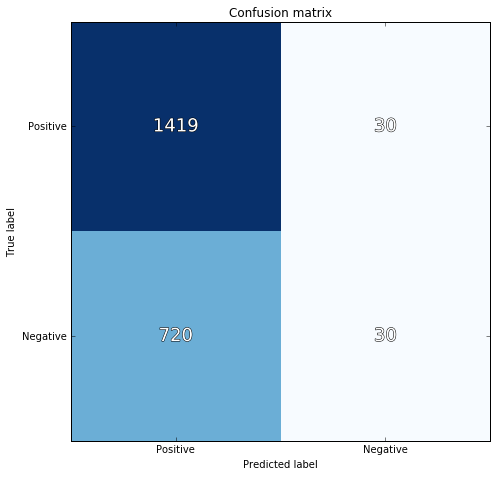

In [98]:
preds = gsrf.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

In [89]:
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X1, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 3, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.661299126638
[[1394   55]
 [ 666   84]]
             precision    recall  f1-score   support

          0       0.68      0.96      0.79      1449
          1       0.60      0.11      0.19       750

avg / total       0.65      0.67      0.59      2199



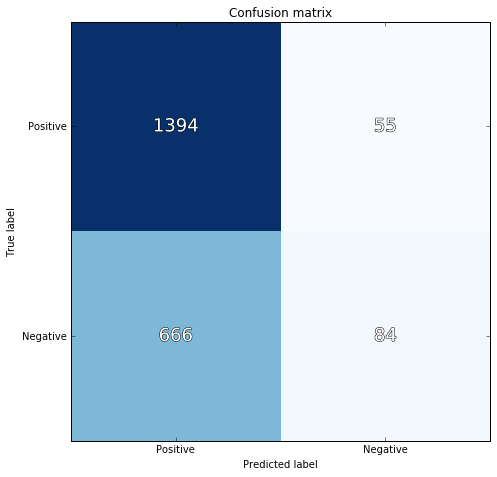

In [99]:
preds = gset.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm)

,score
model,
gssvm,0.677126
gsbagginglr,0.675307
lr,0.673943
gslr,0.673488
gsbaggingsvm,0.672124
gset,0.672124
gsdt,0.670759
gsbaggingdt,0.667121
gsrf,0.658936


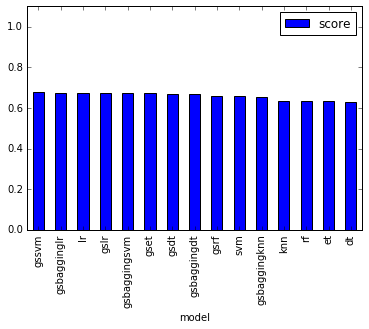

In [90]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.0, 1.1)

scores

In [91]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X1, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres

knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


,score,error
model,,
gssvm,0.673171,0.004753
gsbaggingsvm,0.670032,0.002251
gsbagginglr,0.668805,0.005265
lr,0.668531,0.005928
gslr,0.668396,0.005580
gsrf,0.663619,0.002178
gsdt,0.662119,0.007047
svm,0.661162,0.001331
knn,0.660070,0.004090


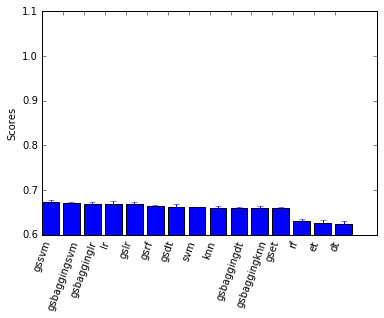

In [92]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

# cvscores.to_csv('../../../5.2-lesson/assets/datasets/car_evaluation/model_comparison.csv')
cvscores